In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.model_selection as ms
import sklearn.metrics as sklm
from sklearn import preprocessing

import numpy.random as nr
import scipy.stats as ss
import math
#import missingno as mn           # For visualizing missing values.
from scipy import stats          # For statistics

%matplotlib inline

In [88]:
'''Customize visualization.'''
plt.rcParams['figure.figsize'] = [18,2.5]  # Create all the figure size by this dimension
plt.style.use('ggplot')                    # Use ggplot's style for plotting
sns.set_style({'axes.grid' : False})       # Removes gridlines

In [89]:
'''Displays markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [56]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
bold('**Train data:**')
display(train_data.head())

**Train data:**

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [6]:
bold('**Train data:**')
display(test_data.head())

**Train data:**

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,DRA59,CHUKWUDI010,DRA59_CHUKWUDI010,8.270,Normal Fat,0.214125,Soft Drinks,459.98,2005,NaN,Cluster 3,Grocery Store
1,DRA59,CHUKWUDI013,DRA59_CHUKWUDI013,8.270,Normal Fat,0.127821,Soft Drinks,464.98,1994,High,Cluster 3,Supermarket Type1
2,DRB01,CHUKWUDI013,DRB01_CHUKWUDI013,7.390,Low Fat,0.082171,Soft Drinks,477.38,1994,High,Cluster 3,Supermarket Type1
3,DRB13,CHUKWUDI010,DRB13_CHUKWUDI010,6.115,Normal Fat,0.011791,Soft Drinks,472.63,2005,NaN,Cluster 3,Grocery Store
4,DRB13,CHUKWUDI013,DRB13_CHUKWUDI013,6.115,Normal Fat,0.007038,Soft Drinks,473.13,1994,High,Cluster 3,Supermarket Type1


In [57]:
'''Merge the dataset'''
merged = pd.concat([train_data, test_data])
bold('**Merged data:**')
display(merged.iloc[4986:4999,:])

**Merged data:**

,Product_Fat_Content,Product_Identifier,Product_Price,Product_Shelf_Visibility,Product_Supermarket_Identifier,Product_Supermarket_Sales,Product_Type,Product_Weight,Supermarket _Size,Supermarket_Identifier,Supermarket_Location_Type,Supermarket_Opening_Year,Supermarket_Type
4986,Low Fat,NCZ54,410.14,0.082956,NCZ54_CHUKWUDI027,13808.69,Household,NaN,Medium,CHUKWUDI027,Cluster 3,1992,Supermarket Type3
4987,Low Fat,NCZ54,406.14,0.083528,NCZ54_CHUKWUDI045,5685.93,Household,14.650,NaN,CHUKWUDI045,Cluster 2,2009,Supermarket Type1
4988,Low Fat,NCZ54,404.89,0.083359,NCZ54_CHUKWUDI046,11778.00,Household,14.650,Small,CHUKWUDI046,Cluster 1,2004,Supermarket Type1
4989,Low Fat,NCZ54,403.39,0.083489,NCZ54_CHUKWUDI049,17870.07,Household,14.650,Medium,CHUKWUDI049,Cluster 1,2006,Supermarket Type1
0,Normal Fat,DRA59,459.98,0.214125,DRA59_CHUKWUDI010,NaN,Soft Drinks,8.270,NaN,CHUKWUDI010,Cluster 3,2005,Grocery Store
1,Normal Fat,DRA59,464.98,0.127821,DRA59_CHUKWUDI013,NaN,Soft Drinks,8.270,High,CHUKWUDI013,Cluster 3,1994,Supermarket Type1
2,Low Fat,DRB01,477.38,0.082171,DRB01_CHUKWUDI013,NaN,Soft Drinks,7.390,High,CHUKWUDI013,Cluster 3,1994,Supermarket Type1
3,Normal Fat,DRB13,472.63,0.011791,DRB13_CHUKWUDI010,NaN,Soft Drinks,6.115,NaN,CHUKWUDI010,Cluster 3,2005,Grocery Store
4,Normal Fat,DRB13,473.13,0.007038,DRB13_CHUKWUDI013,NaN,Soft Drinks,6.115,High,CHUKWUDI013,Cluster 3,1994,Supermarket Type1
5,Low Fat,DRB25,268.73,0.069853,DRB25_CHUKWUDI017,NaN,Soft Drinks,12.300,NaN,CHUKWUDI017,Cluster 2,2014,Supermarket Type1


In [8]:
merged.shape

(8522, 13)

## Numerical Features

In [11]:
def abs_bar_labels():
    plt.ylabel('Absolute Frequency')
    plt.xticks(rotation = 0)
    plt.yticks([])
    # Set individual bar lebels in absolute number
    for x in ax.patches:
        ax.annotate(x.get_height(), 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = 14, color = 'black')

'''#1.Summary statistics with histogram'''
def summary_stats_and_hist(variable):
    global ax
    stats = variable.describe()
    ax = variable.plot.hist()
    plt.xlabel('%s' %variable.name)
    plt.title('Distribution of %s with Histogram' %variable.name)
    abs_bar_labels()
    print('Summary Statistics of', variable.name, ':')
    return display(stats)

'''#2.Density plot with skewness.'''
def density_plot_and_skewness(variable):
    variable.plot.hist(density = True)
    variable.plot.kde(style = 'k--')
    plt.xlabel('%s'%variable.name)
    plt.title('Distribution of %s with Density Plot & Histogram' %variable.name)
    print('Skewness of ', variable.name, ':')
    skewness = variable.skew()
    return display(skewness)

Summary Statistics of Product_Price :


count    8522.000000
mean      352.471687
std       155.693760
min        78.230000
25%       234.542500
50%       357.450000
75%       464.130000
max       667.220000
Name: Product_Price, dtype: float64

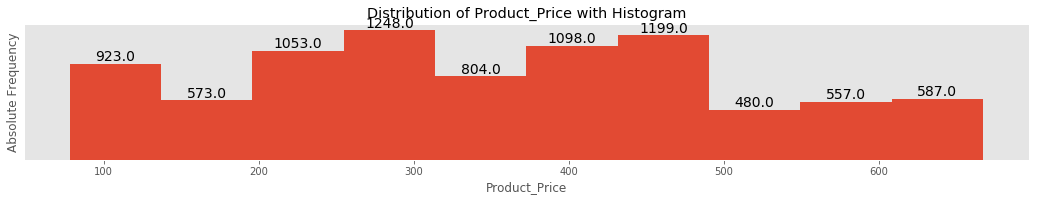

In [12]:
'''Calculate summary statistics of Product_Price with histogram.'''
summary_stats_and_hist(merged.Product_Price)

Skewness of  Product_Price :


0.1273807021624234

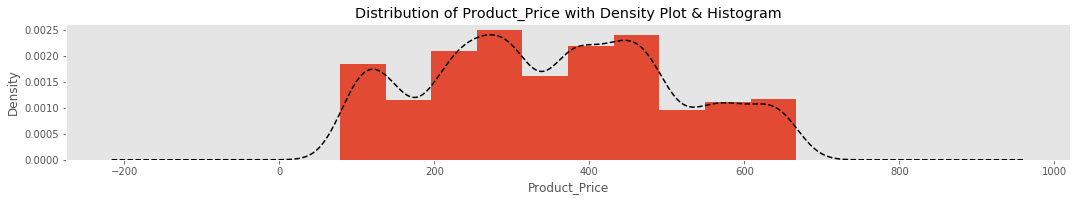

In [20]:
'''Plot density plot of Product_Price  and calculate skewness.'''
density_plot_and_skewness(merged.Product_Price )

Summary Statistics of Product_Weight :


count    7059.000000
mean       12.857115
std         4.643572
min         4.555000
25%         8.772500
50%        12.600000
75%        16.850000
max        21.350000
Name: Product_Weight, dtype: float64

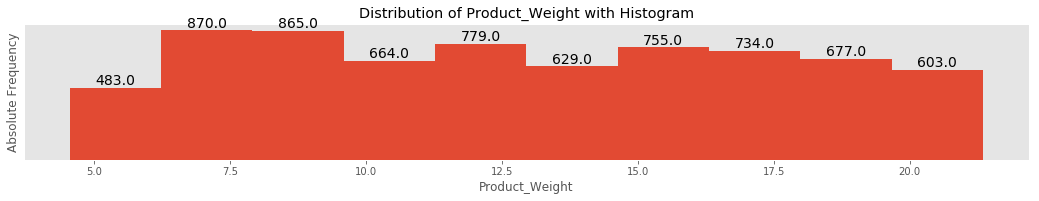

In [13]:
'''Calculate summary statistics of Product_Weight  with histogram.'''
summary_stats_and_hist(merged.Product_Weight )

Skewness of  Product_Weight :


0.08270017233105988

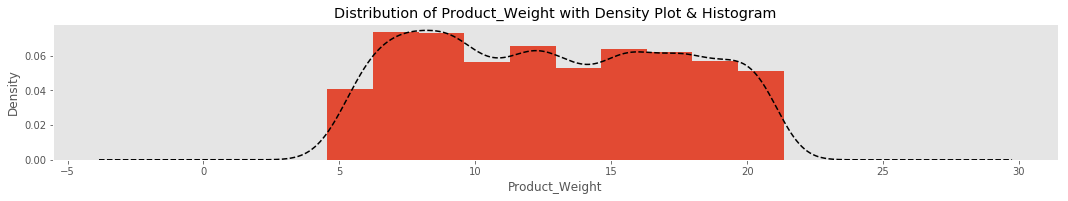

In [19]:
'''Plot density plot of Product_Weight  and calculate skewness.'''
density_plot_and_skewness(merged.Product_Weight )

Summary Statistics of Product_Shelf_Visibility :


count    8522.000000
mean        0.066134
std         0.051600
min         0.000000
25%         0.026988
50%         0.053935
75%         0.094594
max         0.328391
Name: Product_Shelf_Visibility, dtype: float64

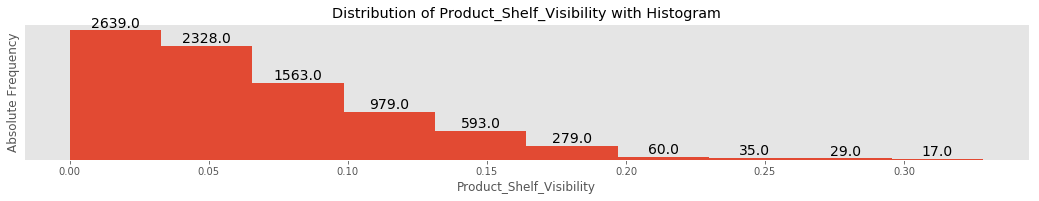

In [14]:
'''Calculate summary statistics of Product_Shelf_Visibility  with histogram.'''
summary_stats_and_hist(merged.Product_Shelf_Visibility )

Skewness of  Product_Shelf_Visibility :


1.1669234106223025

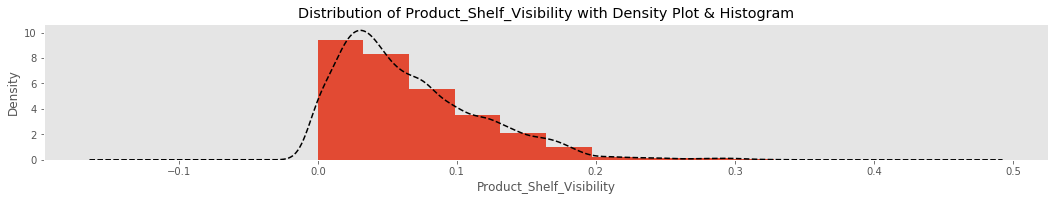

In [15]:
'''Plot density plot of Product_Shelf_Visibility and calculate skewness.'''
density_plot_and_skewness(merged.Product_Shelf_Visibility)

In [21]:
"""Let's count the missing values for each variable."""
bold('**Missing values for each variable:**')
display(merged.isnull().sum())

**Missing values for each variable:**

Product_Fat_Content                  0
Product_Identifier                   0
Product_Price                        0
Product_Shelf_Visibility             0
Product_Supermarket_Identifier       0
Product_Supermarket_Sales         3532
Product_Type                         0
Product_Weight                    1463
Supermarket _Size                 2409
Supermarket_Identifier               0
Supermarket_Location_Type            0
Supermarket_Opening_Year             0
Supermarket_Type                     0
dtype: int64

In [58]:
merged.columns = [str.replace(' _', '_') for str in merged.columns]

In [59]:
merged.columns

Index(['Product_Fat_Content', 'Product_Identifier', 'Product_Price',
       'Product_Shelf_Visibility', 'Product_Supermarket_Identifier',
       'Product_Supermarket_Sales', 'Product_Type', 'Product_Weight',
       'Supermarket_Size', 'Supermarket_Identifier',
       'Supermarket_Location_Type', 'Supermarket_Opening_Year',
       'Supermarket_Type'],
      dtype='object')

In [25]:
merged['Supermarket_Size'].fillna('NaN', inplace=True)

In [26]:
correlation = merged.loc[:, ['Product_Fat_Content', 'Product_Price','Product_Shelf_Visibility', 'Product_Supermarket_Identifier', 'Product_Type', 'Supermarket_Size', 'Supermarket_Location_Type', 'Supermarket_Opening_Year', 'Supermarket_Type']]

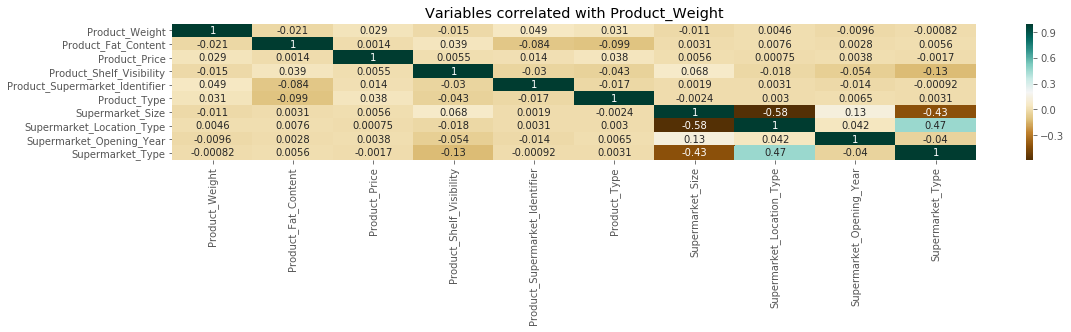

In [27]:
"""Let's plot correlation heatmap to see which variable is highly correlated with Age and if our boxplot interpretation holds true. We need to convert categorical variable into numerical to plot correlation heatmap. So convert categorical variables into numerical."""
from sklearn.preprocessing import LabelEncoder
correlation = correlation.agg(LabelEncoder().fit_transform)
correlation['Product_Weight'] = merged.Product_Weight # Inserting Age in dataframe correlation
correlation = correlation.set_index('Product_Weight').reset_index() # Move Age at index 0.

'''Now create the heatmap correlation.'''
sns.heatmap(correlation.corr(), cmap ='BrBG', annot = True)
plt.title('Variables correlated with Product_Weight')
plt.show()

Object `transform` not found.


In [ ]:
merged.groupby().transform

In [76]:
merged[['Supermarket_Type','Supermarket_Location_Type','Supermarket_Opening_Year','Supermarket_Opening_Year','Supermarket_Size']].head()

,Supermarket_Type,Supermarket_Location_Type,Supermarket_Opening_Year,Supermarket_Opening_Year,Supermarket_Size
0,Grocery Store,Cluster 3,2005,2005,NaN
1,Supermarket Type1,Cluster 3,1994,1994,High
2,Supermarket Type1,Cluster 2,2014,2014,NaN
3,Supermarket Type2,Cluster 3,2016,2016,Medium
4,Supermarket Type1,Cluster 2,2011,2011,Small


In [33]:
merged['Supermarket_Type'].unique(),merged['Supermarket_Size'].unique()

(array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
        'Supermarket Type3'], dtype=object),
 array(['NaN', 'High', 'Medium', 'Small'], dtype=object))

In [86]:
merged.groupby(['Supermarket_Type','Supermarket_Location_Type','Supermarket_Opening_Year','Supermarket_Size'])['Supermarket_Size'].count()

Supermarket_Type   Supermarket_Location_Type  Supermarket_Opening_Year  Supermarket_Size
Grocery Store      Cluster 1                  1992                      Small               528
Supermarket Type1  Cluster 1                  2004                      Small               930
                                              2006                      Medium              930
                   Cluster 2                  2011                      Small               930
                   Cluster 3                  1994                      High                932
Supermarket Type2  Cluster 3                  2016                      Medium              928
Supermarket Type3  Cluster 3                  1992                      Medium              935
Name: Supermarket_Size, dtype: int64

In [60]:
merged.head(10)

,Product_Fat_Content,Product_Identifier,Product_Price,Product_Shelf_Visibility,Product_Supermarket_Identifier,Product_Supermarket_Sales,Product_Type,Product_Weight,Supermarket_Size,Supermarket_Identifier,Supermarket_Location_Type,Supermarket_Opening_Year,Supermarket_Type
0,Low Fat,DRA12,357.54,0.068535,DRA12_CHUKWUDI010,709.08,Soft Drinks,11.60,NaN,CHUKWUDI010,Cluster 3,2005,Grocery Store
1,Low Fat,DRA12,355.79,0.040912,DRA12_CHUKWUDI013,6381.69,Soft Drinks,11.60,High,CHUKWUDI013,Cluster 3,1994,Supermarket Type1
2,Low Fat,DRA12,350.79,0.041178,DRA12_CHUKWUDI017,6381.69,Soft Drinks,11.60,NaN,CHUKWUDI017,Cluster 2,2014,Supermarket Type1
3,Low Fat,DRA12,355.04,0.041113,DRA12_CHUKWUDI018,2127.23,Soft Drinks,11.60,Medium,CHUKWUDI018,Cluster 3,2016,Supermarket Type2
4,Ultra Low fat,DRA12,354.79,0.000000,DRA12_CHUKWUDI035,2481.77,Soft Drinks,11.60,Small,CHUKWUDI035,Cluster 2,2011,Supermarket Type1
5,Low Fat,DRA12,354.04,0.000000,DRA12_CHUKWUDI045,9572.54,Soft Drinks,11.60,NaN,CHUKWUDI045,Cluster 2,2009,Supermarket Type1
6,Normal Fat,DRA24,409.72,0.066832,DRA24_CHUKWUDI010,818.93,Soft Drinks,19.35,NaN,CHUKWUDI010,Cluster 3,2005,Grocery Store
7,Normal Fat,DRA24,406.22,0.039895,DRA24_CHUKWUDI013,11055.61,Soft Drinks,19.35,High,CHUKWUDI013,Cluster 3,1994,Supermarket Type1
8,Normal Fat,DRA24,411.72,0.040154,DRA24_CHUKWUDI017,2866.27,Soft Drinks,19.35,NaN,CHUKWUDI017,Cluster 2,2014,Supermarket Type1
9,Normal Fat,DRA24,408.22,0.069909,DRA24_CHUKWUDI019,1228.40,Soft Drinks,NaN,Small,CHUKWUDI019,Cluster 1,1992,Grocery Store


In [66]:
train_data['index'] = range(len(train_data))

In [69]:
train_data.set_index('index', inplace=True)

In [70]:
train_data.head(10)

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
index,,,,,,,,,,,,,
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.60,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.60,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.60,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.60,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.60,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77
5,DRA12,CHUKWUDI045,DRA12_CHUKWUDI045,11.60,Low Fat,0.000000,Soft Drinks,354.04,2009,NaN,Cluster 2,Supermarket Type1,9572.54
6,DRA24,CHUKWUDI010,DRA24_CHUKWUDI010,19.35,Normal Fat,0.066832,Soft Drinks,409.72,2005,NaN,Cluster 3,Grocery Store,818.93
7,DRA24,CHUKWUDI013,DRA24_CHUKWUDI013,19.35,Normal Fat,0.039895,Soft Drinks,406.22,1994,High,Cluster 3,Supermarket Type1,11055.61
8,DRA24,CHUKWUDI017,DRA24_CHUKWUDI017,19.35,Normal Fat,0.040154,Soft Drinks,411.72,2014,NaN,Cluster 2,Supermarket Type1,2866.27


In [71]:
train_data.loc[train_data.Product_Weight.isnull(), 'Product_Weight'] = train_data.loc[train_data.Product_Weight.isnull(), 'Product_Identifier'].map(train_data.loc[train_data.Product_Weight.notnull()].set_index('Product_Identifier')['Product_Weight'])

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
merged.head(10)